In [1]:
# Relevant libraries
from Ben_s_Analysis.FunkEquations import Funk_Equation_LowPPM, Funk_Equation_LowPPM2, Funk_Equation_HighPPM, Funk_Equation_FullPPM
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_20012/770827474.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Predicted PPM'] = y_pred


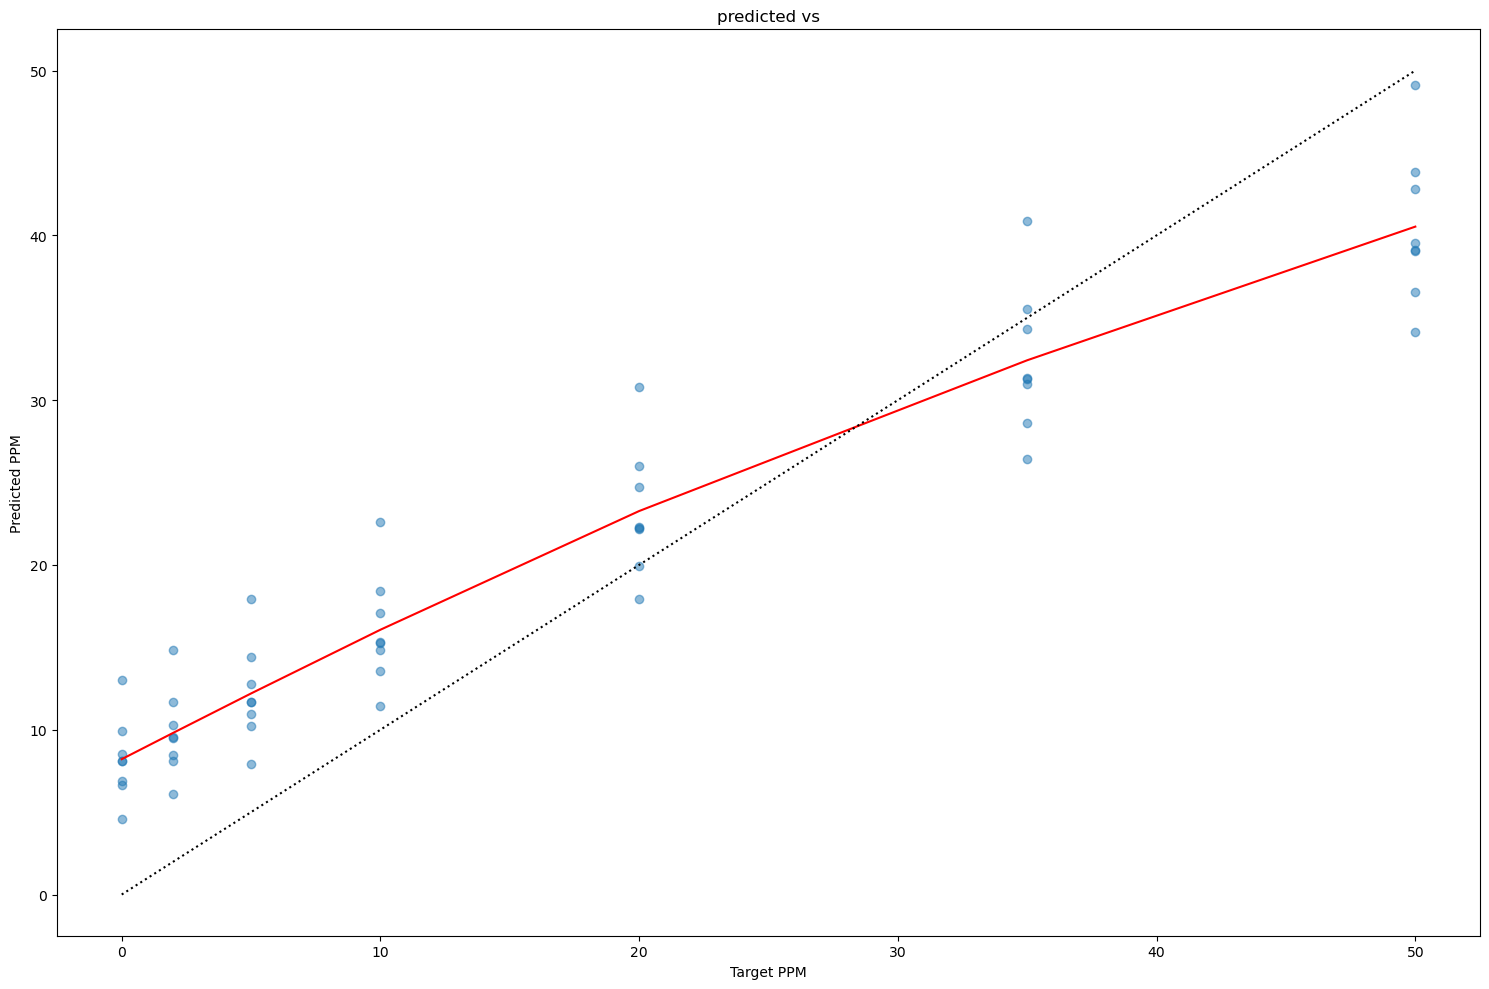

In [4]:
file2 = pd.read_csv("../../Output/LowPPMMatrix.csv")

# Humidity values
humidity_values = [30]  # Updated humidity values

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Single subplot for one humidity value

for i, H in enumerate(humidity_values):
    # Filter data
    mask = (file2['RelativeHumidity'] >= H - 5) & (file2['RelativeHumidity'] <= H + 5) & (file2['Temperature'] <= 40) & (file2['Temperature'] >= 30)
    df_filtered = file2.loc[mask]

    xDataResistance1 = df_filtered['Resistance']
    xDataRH1 = df_filtered['RelativeHumidity']
    xDataTemp1 = df_filtered['Temperature']
    yDataTargetPPM1 = df_filtered['Target PPM']

    y_pred = Funk_Equation_LowPPM((xDataResistance1, xDataRH1, xDataTemp1))
    df_filtered['Predicted PPM'] = y_pred

    # Scatter plot
    axs.scatter(yDataTargetPPM1, y_pred, alpha=.5)

    # Mean prediction per target PPM
    mean_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].mean()
    axs.plot(mean_pred_per_target_ppm.index, mean_pred_per_target_ppm.values, color='r')

    # Linear dotted line
    axs.plot(yDataTargetPPM1, yDataTargetPPM1, 'k:')

    # Labels and titles
    axs.set_xlabel('Target PPM')
    axs.set_ylabel('Predicted PPM')
    axs.set_title('predicted vs')

# Show plot
plt.tight_layout()
plt.show()

/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_20012/3243792100.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Predicted PPM'] = y_pred


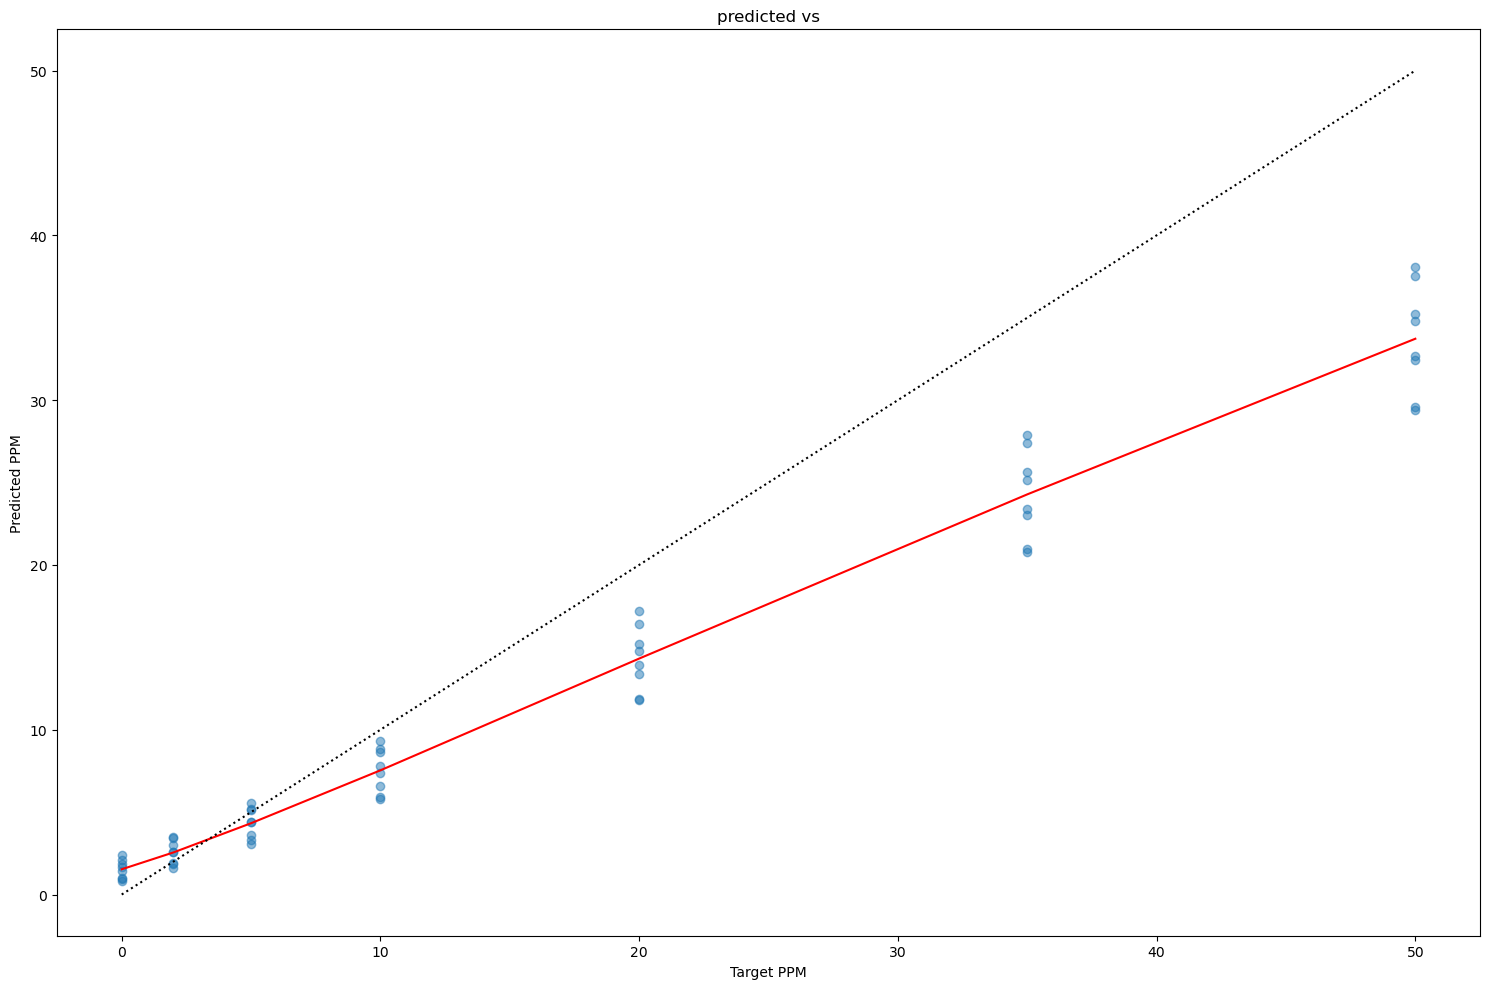

In [3]:
# Humidity values
humidity_values = [30]  # Updated humidity values

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Single subplot for one humidity value

for i, H in enumerate(humidity_values):
    # Filter data
    mask = (file2['RelativeHumidity'] >= H - 5) & (file2['RelativeHumidity'] <= H + 5) & (file2['Temperature'] <= 25) & (file2['Temperature'] >= 15)
    df_filtered = file2.loc[mask]

    xDataResistance1 = df_filtered['Resistance']
    xDataRH1 = df_filtered['RelativeHumidity']
    xDataTemp1 = df_filtered['Temperature']
    yDataTargetPPM1 = df_filtered['Target PPM']

    y_pred = Funk_Equation_LowPPM2((xDataResistance1, xDataRH1, xDataTemp1))
    df_filtered['Predicted PPM'] = y_pred

    # Scatter plot
    axs.scatter(yDataTargetPPM1, y_pred, alpha=.5)

    # Mean prediction per target PPM
    mean_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].mean()
    axs.plot(mean_pred_per_target_ppm.index, mean_pred_per_target_ppm.values, color='r')

    # Linear dotted line
    axs.plot(yDataTargetPPM1, yDataTargetPPM1, 'k:')

    # Labels and titles
    axs.set_xlabel('Target PPM')
    axs.set_ylabel('Predicted PPM')
    axs.set_title('predicted vs')

# Show plot
plt.tight_layout()
plt.show()